# Lab 4: Data Visualization and EDA

#### CPE232 Data Models

---

1. Load all Superstore datasets.

*Note: The same datasets used in Lab 3*

In [2]:
# Write your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dfOrder = pd.read_csv("superstore_order.csv")
dfPeople = pd.read_csv("superstore_people.csv")
dfReturn = pd.read_csv("superstore_return.csv")

print(dfOrder.head())
print(dfPeople.head())
print(dfReturn.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156  08/11/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156  08/11/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688  12/06/2016  16/06/2016    Second Class    DV-13045   
3       4  US-2015-108966  11/10/2015  18/10/2015  Standard Class    SO-20335   
4       5  US-2015-108966  11/10/2015  18/10/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3    Sean ODonnell   Consumer  United States  Fort Lauderdale  ...   
4    Sean ODonnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

2. Determine shape of each dataset (print out the results as well).


In [3]:
# Write your code here
print(dfOrder.shape)
print(dfPeople.shape)
print(dfReturn.shape)



(8880, 21)
(4, 2)
(296, 2)


3. Show information of the dataset.


In [4]:
# Write your code here

print(dfOrder.info())
print(dfPeople.info())
print(dfReturn.info())

# print(dfOrder.isnull().sum())
# print(dfPeople.isnull().sum())
# print(dfReturn.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8880 entries, 0 to 8879
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         8880 non-null   int64  
 1   Order ID       8880 non-null   object 
 2   Order Date     8880 non-null   object 
 3   Ship Date      8880 non-null   object 
 4   Ship Mode      8880 non-null   object 
 5   Customer ID    8880 non-null   object 
 6   Customer Name  8880 non-null   object 
 7   Segment        8880 non-null   object 
 8   Country        8880 non-null   object 
 9   City           8880 non-null   object 
 10  State          8880 non-null   object 
 11  Postal Code    8880 non-null   int64  
 12  Region         8880 non-null   object 
 13  Product ID     8880 non-null   object 
 14  Category       8880 non-null   object 
 15  Sub-Category   8880 non-null   object 
 16  Product Name   8880 non-null   object 
 17  Sales          8880 non-null   float64
 18  Quantity

4. Are there any missing values? If so, in which column?

Ans: No, there are no missing values in any column.


5.
- 5.1 List unique segments
- 5.2 List unique segments and their corresponding count
- 5.3 Create a pie chart to demonstrate unique segments and their count
- 5.4 Briefly describe what could be interpreted from this pie chart

*Note: please create additional cells to answer 5.2 - 5.3*

In [5]:
# Write your code here (5.1)

uniqueSegments= dfOrder.Segment.unique()
print("Unique segments:", uniqueSegments)


Unique segments: ['Consumer' 'Corporate' 'Home Office']


In [28]:
# 5.2
segmentCounts = dfOrder.Segment.value_counts()
print(segmentCounts)


Segment
Consumer       4613
Corporate      2673
Home Office    1594
Name: count, dtype: int64


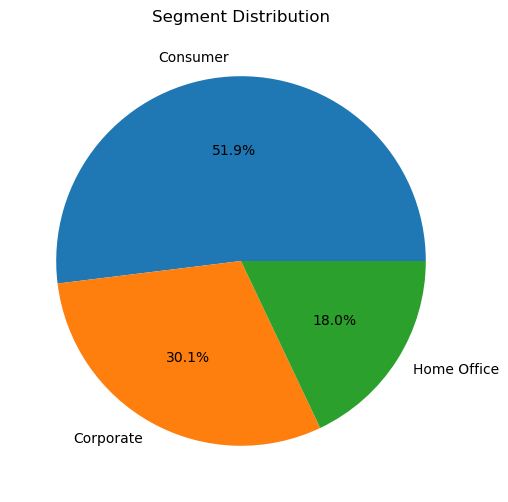

In [29]:
# 5.3
plt.figure(figsize=(8, 6)) 
plt.pie(segmentCounts, labels=segmentCounts.index, autopct="%1.1f%%")
plt.title("Segment Distribution")
plt.show()



Answer for the question 5.4

Ans: The Consumer segment dominates (51.9%), indicating a strong focus on retail customers. Corporate (30.1%) and Home Office (18.0%) suggest opportunities for B2B and freelancer-targeted strategies. The company could optimize marketing efforts for both individual and business clients

6.
- 6.1 List unique states
- 6.2 List top-10 unique states and their corresponding count
- 6.3 Create a bar chart (vertical) to demonstrate the count of top-10 unique states
- 6.4 Based on 6.2, also include the total sales of these states (show your result as a dataframe)
- 6.5 Using the result from 6.4, if you were the owner of this superstore, what information could be interpreted from this result?

*Note: please create additional cells to answer 6.2 - 6.4*

In [20]:
# Write your code here (6.1)
# 6.1: List unique states

uniqueStates = dfOrder['State'].unique()
uniqueStates


array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [21]:
# 6.2

top10States = dfOrder['State'].value_counts().head(10).reset_index()
top10States.columns = ['State', 'Count']
top10States


,State,Count
0,California,1754
1,New York,1001
2,Texas,860
3,Pennsylvania,531
4,Washington,452
5,Illinois,427
6,Ohio,396
7,Florida,339
8,Michigan,230
9,North Carolina,229


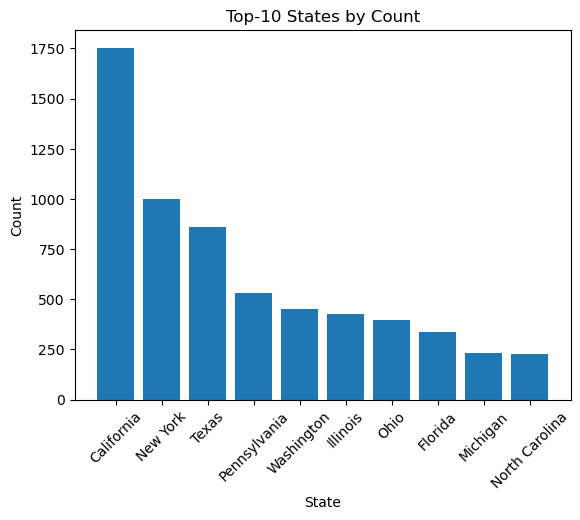

In [22]:
# 6?3
plt.bar(top10States['State'], top10States['Count'])

plt.xlabel('State')
plt.ylabel('Count')
plt.title('Top-10 States by Count')
plt.xticks(rotation=45)  

plt.show()

In [27]:
# 6.4

filteredDf = dfOrder[dfOrder['State'].isin(top10States['State'])]

salesByState = filteredDf.groupby('State')['Sales'].sum().reset_index()
salesByState.columns = ['State', 'Total Sales']

top10statesSales = pd.merge(top10States, salesByState, on='State')
top10statesSales

,State,Count,Total Sales
0,California,1754,399195.4555
1,New York,1001,274866.8190
2,Texas,860,147855.0282
3,Pennsylvania,531,103852.5210
4,Washington,452,124497.7780
5,Illinois,427,71456.1780
6,Ohio,396,67924.2140
7,Florida,339,84083.0880
8,Michigan,230,62147.6960
9,North Carolina,229,49962.1580


Answer for the question 6.5

Ans: California, New York, and Texas drive the highest sales and order counts, making them prime targets for further investment. States like Pennsylvania and Washington also show solid performance, suggesting potential for growth. Lower average order values in some states indicate opportunities for upselling, targeted marketing, or product mix adjustments to boost revenue.

7.
- 7.1 List unique categories
- 7.2 Create a bar chart (horizontal) to demonstrate the proportion of these categories
- 7.3 Compute the ratio of these categories in percentage and print the results

*Note: please create additional cells to answer 7.2 - 7.3*

In [31]:
# Write your code here (7.1)
uniqueCategories = dfOrder['Category'].unique()
uniqueCategories

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

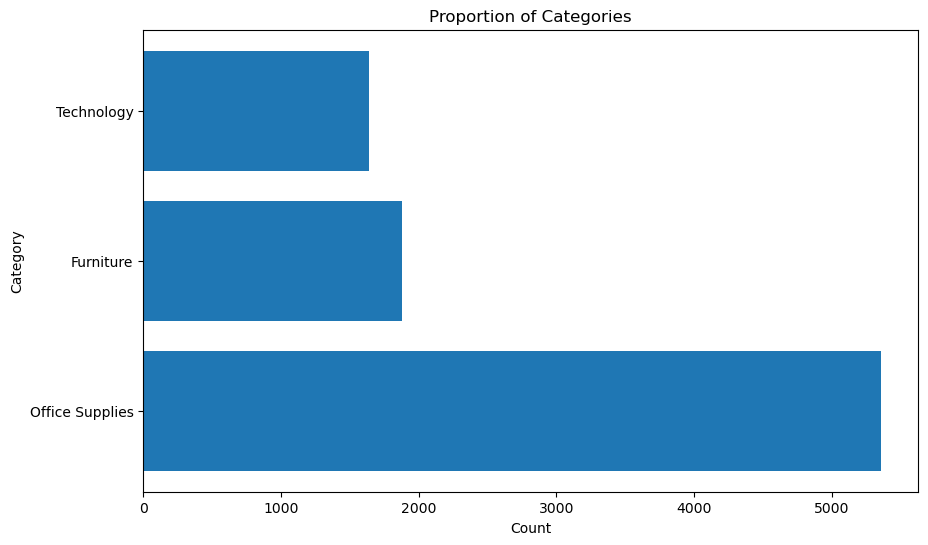

In [32]:
# 7.2

categoryCounts = dfOrder['Category'].value_counts()

plt.figure(figsize=(10, 6))
plt.barh(categoryCounts.index, categoryCounts.values)
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Proportion of Categories')
plt.show()


In [33]:
# 7.3

categoryRatios = (categoryCounts / categoryCounts.sum()) * 100
categoryRatios = categoryRatios.reset_index()
categoryRatios.columns = ['Category', 'Percentage']

categoryRatios


,Category,Percentage
0,Office Supplies,60.360360
1,Furniture,21.171171
2,Technology,18.468468


8. Update the type of all columns that contain dates to *datetime* and show information after an update.

In [36]:
for col in dfOrder.columns:
    if 'Date' in col:
        dfOrder[col] = pd.to_datetime(dfOrder[col], errors='coerce')
        
dfOrder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8880 entries, 0 to 8879
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         8880 non-null   int64         
 1   Order ID       8880 non-null   object        
 2   Order Date     3611 non-null   datetime64[ns]
 3   Ship Date      3477 non-null   datetime64[ns]
 4   Ship Mode      8880 non-null   object        
 5   Customer ID    8880 non-null   object        
 6   Customer Name  8880 non-null   object        
 7   Segment        8880 non-null   object        
 8   Country        8880 non-null   object        
 9   City           8880 non-null   object        
 10  State          8880 non-null   object        
 11  Postal Code    8880 non-null   int64         
 12  Region         8880 non-null   object        
 13  Product ID     8880 non-null   object        
 14  Category       8880 non-null   object        
 15  Sub-Category   8880 n

9. Create a new column "Processing time day" to show number of days taken to ship an order and show your result in a dataframe format.

*Hint: The duration starts as soon as the item has been ordered and ends once the order has successfully shipped.*

In [38]:
# write your code here
dfOrder['Processing time day'] = (dfOrder['Ship Date'] - dfOrder['Order Date']).dt.days
dfOrder[['Order ID', 'Order Date', 'Ship Date', 'Processing time day']].head()


,Order ID,Order Date,Ship Date,Processing time day
0,CA-2016-152156,2016-08-11,2016-11-11,92.0
1,CA-2016-152156,2016-08-11,2016-11-11,92.0
2,CA-2016-138688,2016-12-06,NaT,NaN
3,US-2015-108966,2015-11-10,NaT,NaN
4,US-2015-108966,2015-11-10,NaT,NaN


10. Based on the result in 9.
- 10.1 How many orders are there that take more than 5 days to process?
- 10.2 Show the top 5 rows (expected output should contain these columns: Order ID, Order Date, Ship Date, Processing time day, Quantity)
- 10.3 Plot the histogram based on the column Quantity

*Note: please create additional cells to answer 10.2 - 10.3*

In [43]:
# Write your code here (10.1)
moreThan5Days = dfOrder[dfOrder['Processing time day'] > 5]
countMoreThan5Days = len(moreThan5Days)
countMoreThan5Days


2232

In [44]:
# 102
dfOrder[['Order ID', 'Order Date', 'Ship Date', 'Processing time day', 'Quantity']].head()

,Order ID,Order Date,Ship Date,Processing time day,Quantity
0,CA-2016-152156,2016-08-11,2016-11-11,92.0,2
1,CA-2016-152156,2016-08-11,2016-11-11,92.0,3
2,CA-2016-138688,2016-12-06,NaT,NaN,2
3,US-2015-108966,2015-11-10,NaT,NaN,5
4,US-2015-108966,2015-11-10,NaT,NaN,2


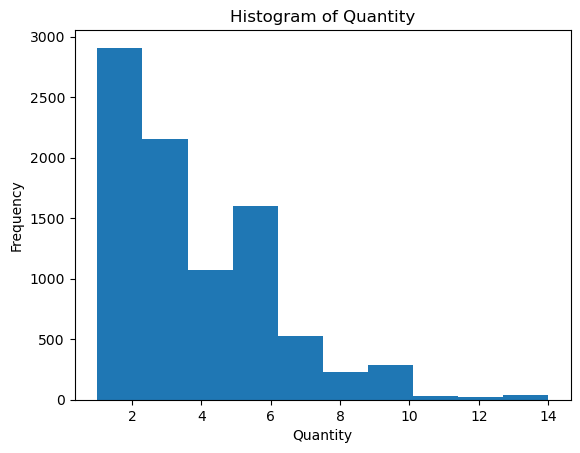

In [ ]:
# 10.3

plt.hist(dfOrder['Quantity'])  #idk if dropna() is needed
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Histogram of Quantity')
plt.show()

11. Total sales compare across different regions
  
- 11.1 Create a bar chart to visualize.

Text(0.5, 1.0, 'Total Sales by Region')

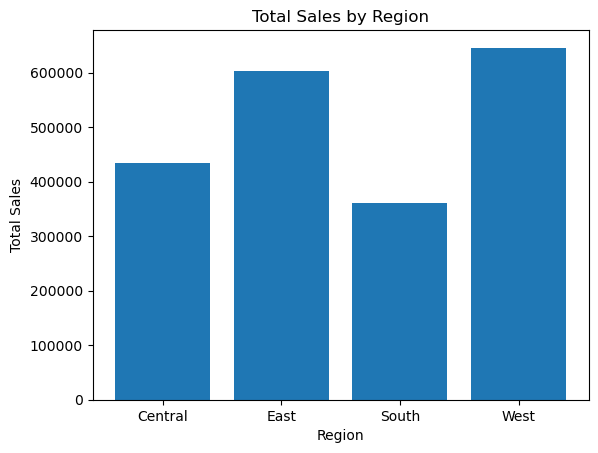

In [47]:
# Write your code here (11.1)*

salesByRegion = dfOrder.groupby('Region')['Sales'].sum()
salesByRegion

plt.bar(salesByRegion.index, salesByRegion.values)
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region')

- 11.2 How do total sales compare across different regions? Explain in as much detail as possible.
  
  Ans: The West region has the highest total sales, followed by the East region. The South region has the lowest total sales.

12.Which states have the highest number of returns? Use a horizontal bar chart.

Ans:  California, Texas, and New York have the highest number of returns.

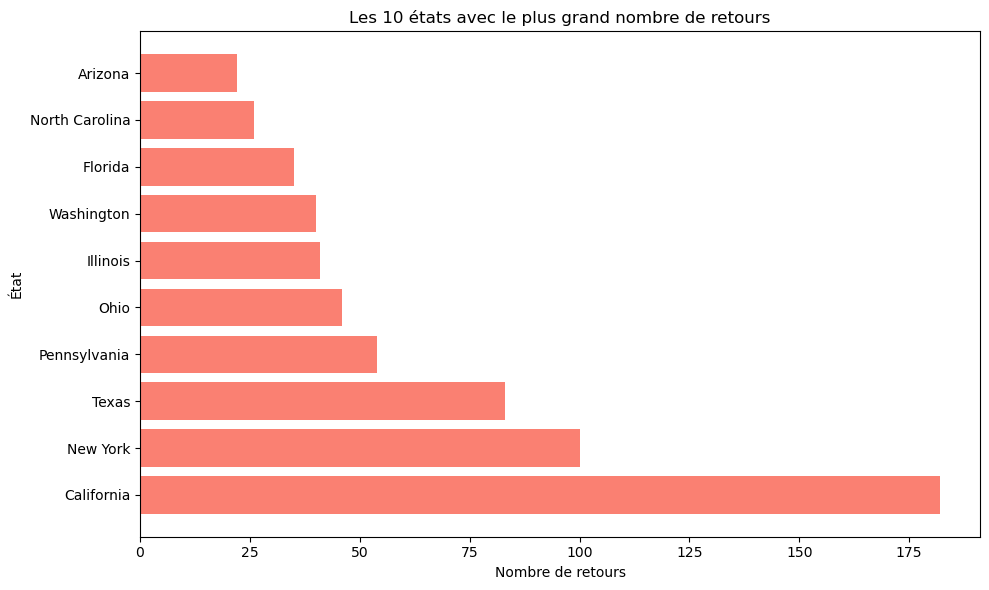

In [57]:

returns_data = dfOrder.sample(frac=0.1) 
returns_by_state = returns_data.groupby('State').size().reset_index(name='Returns')
returns_by_state = returns_by_state.sort_values('Returns', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(returns_by_state['State'], returns_by_state['Returns'], color='salmon')
plt.xlabel('Nombre de retours')
plt.ylabel('État')
plt.title('Les 10 états avec le plus grand nombre de retours')
plt.tight_layout()
plt.show()


13. What is the correlation between numerical variables in the superstore_order dataset? Use a heatmap
*Hint: Use seaborn to create a heatmap :)*

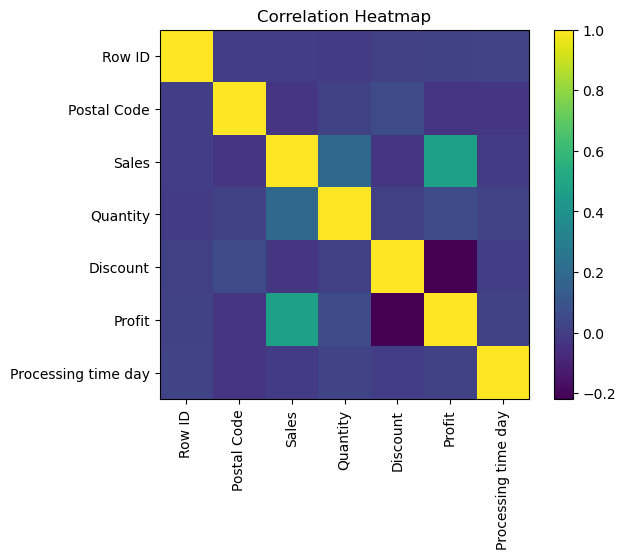

In [65]:
# Write your code here (13)
numerical_cols = dfOrder.select_dtypes(include=[np.number])
corr_matrix = numerical_cols.corr()

plt.imshow(corr_matrix)
plt.colorbar()
ticks = range(len(corr_matrix.columns))

plt.xticks(ticks, corr_matrix.columns, rotation=90)
plt.yticks(ticks, corr_matrix.columns)
plt.title('Correlation Heatmap')
plt.show()

14. Create a USA State-Level Choropleth Map to visualize total sales per state.

*   The darkest color represents the highest total sales.
*   The lightest color represents the lowest total sales.
*   Use a continuous gradient scale (e.g., dark blue to light blue, dark red to light red, or any custom gradient of your choice).

*Hint: Use plotly.express*

In [ ]:
# Write your code here (14)

  14.2 Answer the following questions:
1.   Which state has the highest total sales?
2.   How do sales anomalies affect the gradient color shading on the map?
3.   If you change the color scale, does it impact readability? Why or why not?

Ans:


1.   
2.   
3.



15. Create a box plot to compare the different shipping modes based on total profit.

In [ ]:
#Write your code here (15)

15.2 Which shipping mode has the highest median profit?

Ans:

[BONUS 20 pts] Determine the percentage of customers who:
- B1)returned the product once
- B2) returned the product at least once
- B3) never returned the product
- Finally, Plot a comparison of B2 and B3

*Note: please create additional cells to answer the above points*

In [ ]:
# Write your code here